###Uploading the Images to the drive

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (5).zip to archive (5).zip


In [ ]:
uploaded.keys()


dict_keys(['archive (5).zip'])

In [ ]:
import zipfile
import os

zip_filename = "archive (5).zip"
extract_to = "/content/my_folder"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Unzipped to: {extract_to}")


Unzipped to: /content/my_folder


 ### **Reading the Data**

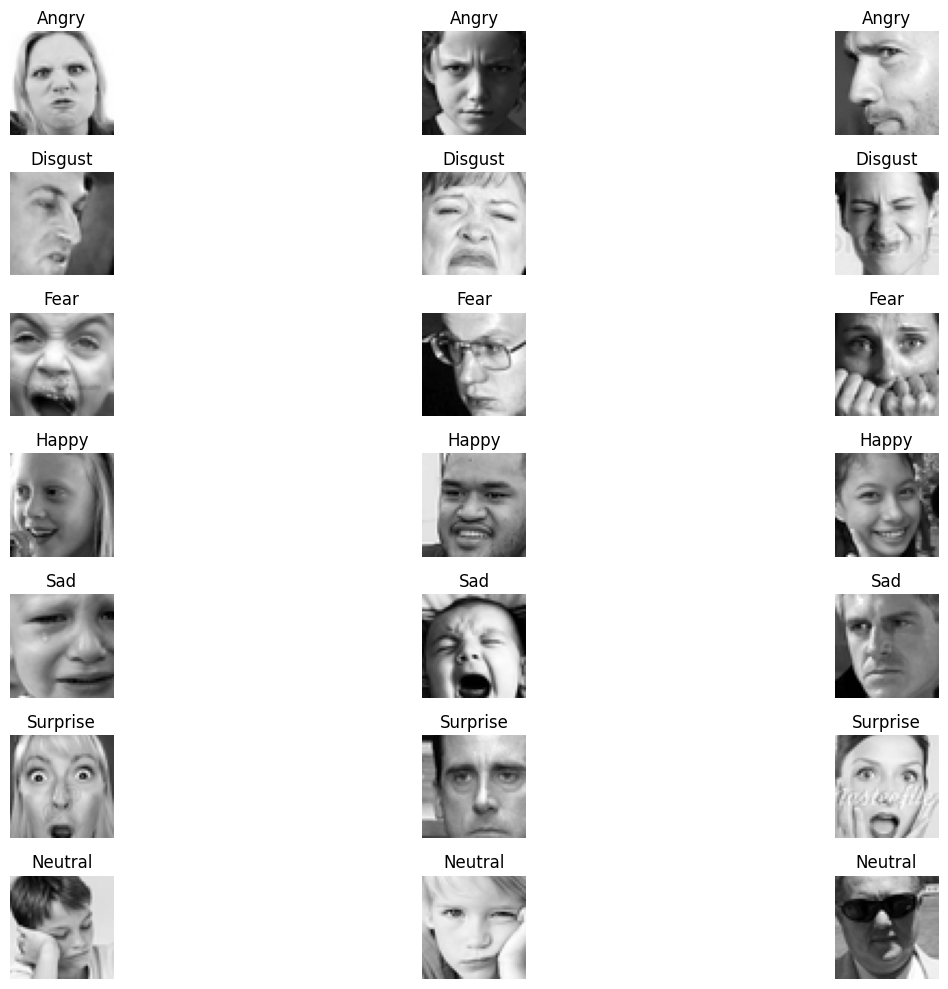

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Corrected path to the train folder
dataset_path = "/content/my_folder/train" #reading the data using the train dataset
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

images_per_emotion = 3
plt.figure(figsize=(15, 10))

for i, emotion in enumerate(emotions):
    emotion_folder = os.path.join(dataset_path, emotion)
    if not os.path.exists(emotion_folder):
        print(f"Folder not found: {emotion_folder}")
        continue

    image_files = os.listdir(emotion_folder)[:images_per_emotion]

    for j, img_file in enumerate(image_files):
        img_path = os.path.join(emotion_folder, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            plt.subplot(len(emotions), images_per_emotion, i * images_per_emotion + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(emotion)
            plt.axis('off')

plt.tight_layout()
plt.show()


### **Count number of images in Train,Test,Validation**

In [ ]:

base_dir = '/content/my_folder'

# Subdirectories
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Emotion classes
categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to count images in each category
def count_images(directory):
    counts = {}
    for category in categories:
        category_path = os.path.join(directory, category)
        if os.path.exists(category_path):
            counts[category] = len(os.listdir(category_path))
        else:
            counts[category] = 0
    return counts

# Print image counts
print("Training Set:", count_images(train_dir))
print("Validation Set:", count_images(val_dir))
print("Test Set:", count_images(test_dir))

Training Set: {'Angry': 3995, 'Disgust': 436, 'Fear': 4097, 'Happy': 7215, 'Sad': 4830, 'Surprise': 3171, 'Neutral': 4965}
Validation Set: {'Angry': 467, 'Disgust': 56, 'Fear': 496, 'Happy': 895, 'Sad': 653, 'Surprise': 415, 'Neutral': 607}
Test Set: {'Angry': 491, 'Disgust': 55, 'Fear': 528, 'Happy': 879, 'Sad': 594, 'Surprise': 416, 'Neutral': 626}


### **Data Cleaning**



1.   Remove Corrupted or Unreadable Files
2.   Standardize Image Sizes
3.    Normalize Pixel Values



In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Parameters
image_size = (48, 48)
dataset_path = "/content/my_folder/train"
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Cleaned data containers
cleaned_images = []
cleaned_labels = []

for emotion in emotions:
    emotion_folder = os.path.join(dataset_path, emotion)
    if not os.path.exists(emotion_folder):
        print(f"Missing folder: {emotion_folder}")
        continue

    for img_file in tqdm(os.listdir(emotion_folder), desc=f"Processing {emotion}"):
        img_path = os.path.join(emotion_folder, img_file)

        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Unreadable image skipped: {img_path}")
                continue

            # Resize
            img_resized = cv2.resize(img, image_size)

            # Normalize
            img_normalized = img_resized / 255.0

            cleaned_images.append(img_normalized)
            cleaned_labels.append(emotion)

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

# Convert to numpy arrays
cleaned_images = np.array(cleaned_images).reshape(-1, 48, 48, 1)
cleaned_labels = np.array(cleaned_labels)

print("Cleaning complete.")
print("Images shape:", cleaned_images.shape)
print("Labels shape:", cleaned_labels.shape)


Processing Neutral: 100%|██████████| 4965/4965 [00:00<00:00, 7366.82it/s]


Cleaning complete.
Images shape: (28709, 48, 48, 1)
Labels shape: (28709,)


### Sunnary of the Dataset after cleaning


*   Contains 28,709 grayscale facial images (48×48), normalized and ready for modelling
*   Total Images: 28,709
*   Image Size: 48x48 pixels (1 grayscale channel)
*   Emotions: Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral
*   Pixel Range: [0.0, 1.0]




### **Exploratory Data Analysis**

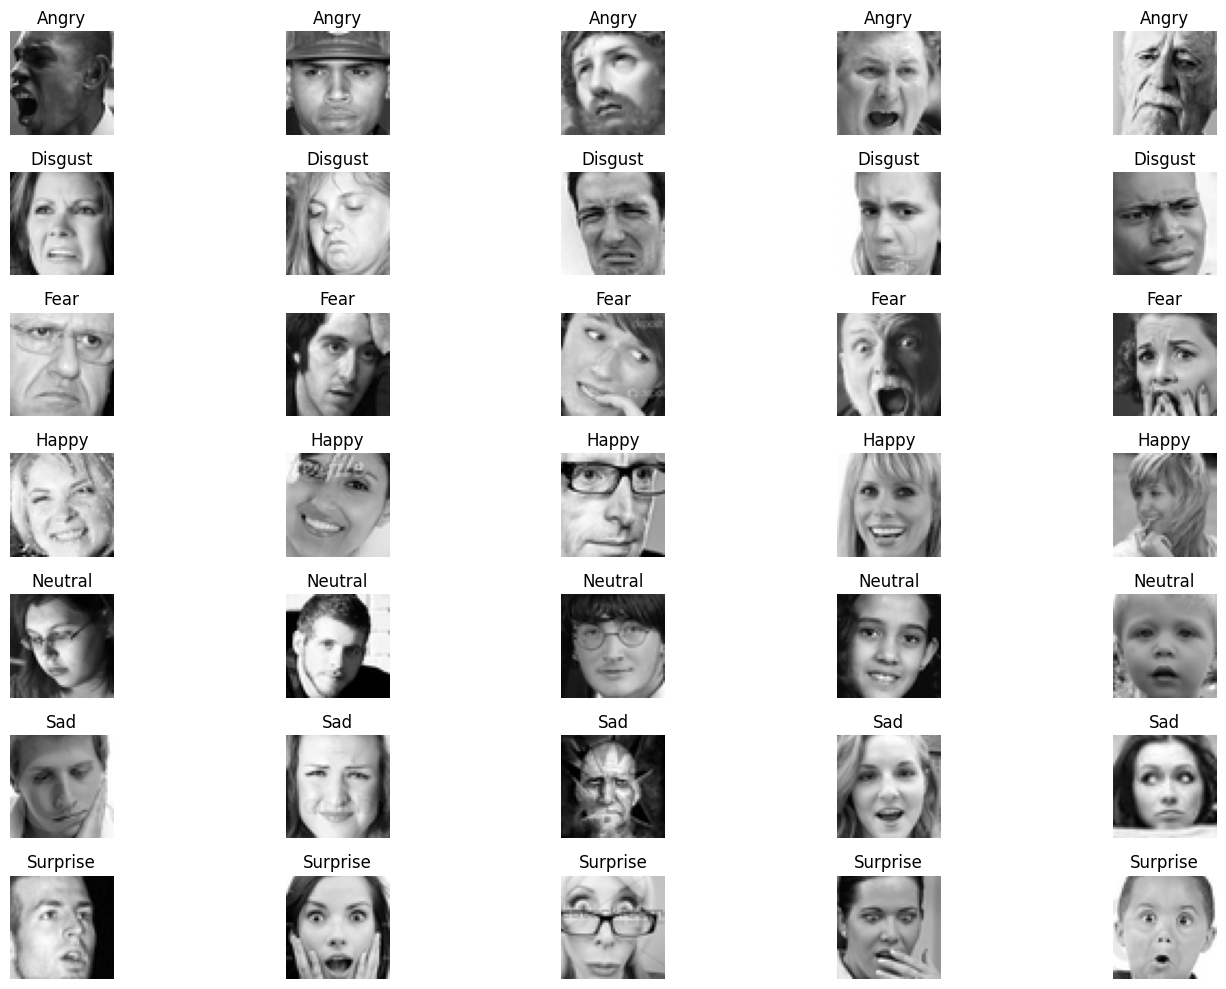

In [ ]:
import matplotlib.pyplot as plt

# Unique emotions
unique_emotions = np.unique(cleaned_labels)

# Plot 5 random images per emotion
plt.figure(figsize=(15, 10))
samples_per_class = 5

for i, emotion in enumerate(unique_emotions):
    idxs = np.where(cleaned_labels == emotion)[0]
    chosen_idxs = np.random.choice(idxs, samples_per_class, replace=False)

    for j, idx in enumerate(chosen_idxs):
        plt.subplot(len(unique_emotions), samples_per_class, i * samples_per_class + j + 1)
        plt.imshow(cleaned_images[idx].squeeze(), cmap='gray')
        plt.title(emotion)
        plt.axis('off')

plt.tight_layout()
plt.show()


### **Number of Images across the Trining Dataset**

<ipython-input-10-58d86067494c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=emotion_df, x='Emotion', order=sorted(emotion_df['Emotion'].unique()), palette='Set2')


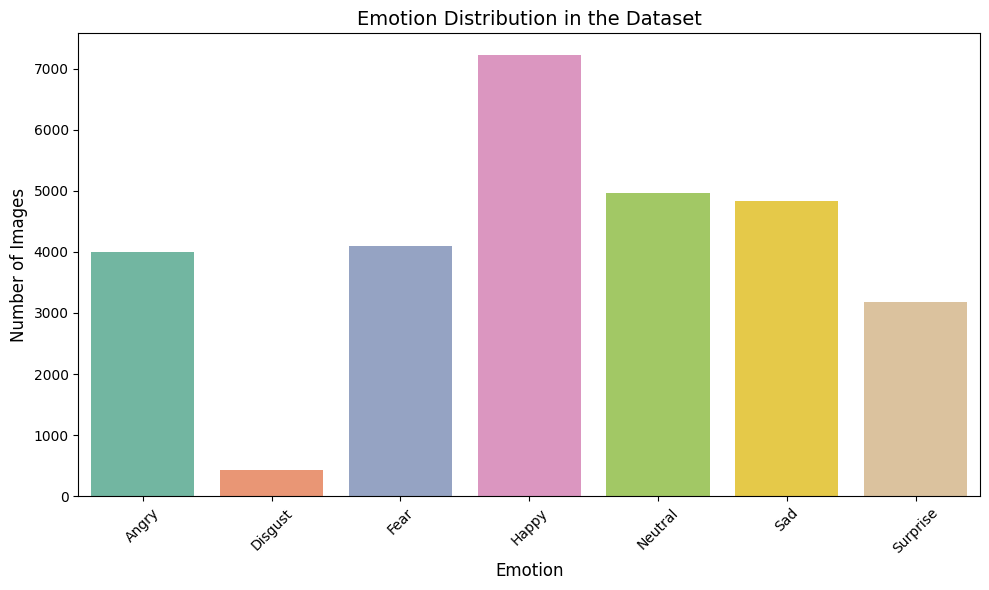

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Wrap labels into a DataFrame
emotion_df = pd.DataFrame({'Emotion': cleaned_labels})

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=emotion_df, x='Emotion', order=sorted(emotion_df['Emotion'].unique()), palette='Set2')

plt.title("Emotion Distribution in the Dataset", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Number of images across Training,Test,Validation Dataset**

<ipython-input-11-2b5526c5bece>:29: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(


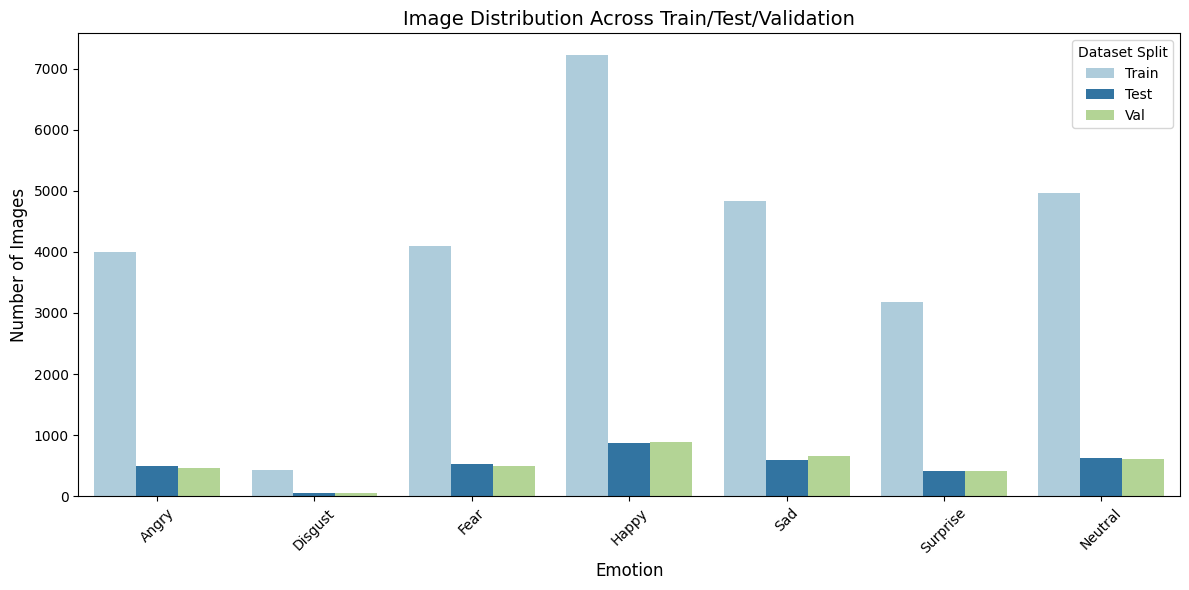

In [ ]:
# Base path and known splits
base_path = "/content/my_folder"
splits = ["train", "test", "val"]
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Count images
data = []

for split in splits:
    split_path = os.path.join(base_path, split)
    if not os.path.exists(split_path):
        continue

    for emotion in emotions:
        emotion_folder = os.path.join(split_path, emotion)
        if not os.path.exists(emotion_folder):
            continue

        count = len(os.listdir(emotion_folder))
        data.append({"Split": split.capitalize(), "Emotion": emotion, "Count": count})

df = pd.DataFrame(data)

# Define a unique color for each emotion
emotion_colors = dict(zip(emotions, sns.color_palette("Paired", len(emotions))))

# Plot with custom emotion colors
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Emotion',
    y='Count',
    hue='Split',
    palette=[emotion_colors[emotion] for emotion in df['Emotion'].unique()]
)

plt.title("Image Distribution Across Train/Test/Validation", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Dataset Split")
plt.tight_layout()
plt.show()


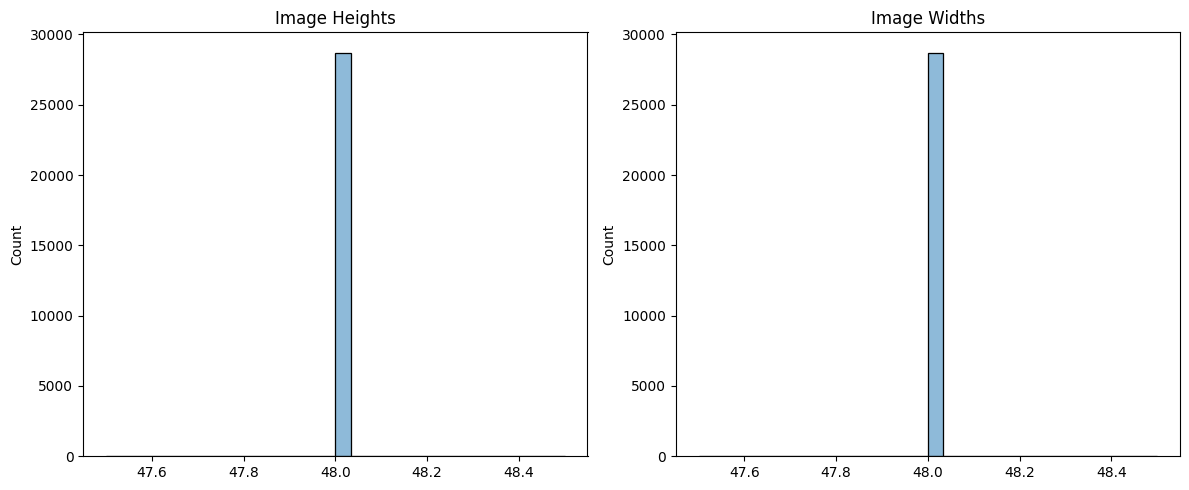

In [ ]:
heights = []
widths = []

for emotion in emotions:
    folder = os.path.join(dataset_path, emotion)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            h, w = img.shape
            heights.append(h)
            widths.append(w)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(heights, bins=30, kde=True)
plt.title("Image Heights")

plt.subplot(1, 2, 2)
sns.histplot(widths, bins=30, kde=True)
plt.title("Image Widths")

plt.tight_layout()
plt.show()


## **Model Building objective**


1. Use classic Machine Learning (ML) algorithms on the training data.
2. Evaluate their performance on the test data
2. Switch to CNNs for deep learning.

This comparison within ML and Deeplearning is an hybrid approach


### **Model Building using Machine Learning Algorithms**

ML algorithms need 1D feature vectors (not 2D images), so we’ll flatten 48x48 grayscale images




 ### Load Images Using TensorFlow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------
# Load grayscale and flatten images
# -------------------------------
def load_and_flatten_images(directory, image_size=(48, 48)):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        labels='inferred',
        label_mode='int',
        color_mode='grayscale',
        image_size=image_size,
        batch_size=32,
        shuffle=False
    )
    images, labels = [], []
    for batch in dataset:
        imgs, lbls = batch
        imgs = imgs.numpy() / 255.0
        imgs = imgs.reshape(imgs.shape[0], -1)
        images.append(imgs)
        labels.append(lbls.numpy())

    X = np.concatenate(images)
    y = np.concatenate(labels)
    class_names = dataset.class_names
    return X, y, class_names

# Load all datasets
train_dir = "/content/my_folder/train"
val_dir = "/content/my_folder/val"
test_dir = "/content/my_folder/test"

X_train, y_train, class_names = load_and_flatten_images(train_dir)
X_val, y_val, _ = load_and_flatten_images(val_dir)
X_test, y_test, _ = load_and_flatten_images(test_dir)

print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")


Found 28709 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.
Train shape: (28709, 2304), Val shape: (3589, 2304), Test shape: (3589, 2304)


### Train & Evaluate Classic ML Models


🔹 Training Random Forest...
 Validation Accuracy: 45.72%
Test Accuracy: 46.87%
Classification Report:
               precision    recall  f1-score   support

       Angry       0.49      0.22      0.31       491
     Disgust       1.00      0.33      0.49        55
        Fear       0.48      0.29      0.36       528
       Happy       0.46      0.76      0.57       879
     Neutral       0.43      0.43      0.43       626
         Sad       0.37      0.37      0.37       594
    Surprise       0.72      0.59      0.65       416

    accuracy                           0.47      3589
   macro avg       0.56      0.43      0.45      3589
weighted avg       0.48      0.47      0.45      3589



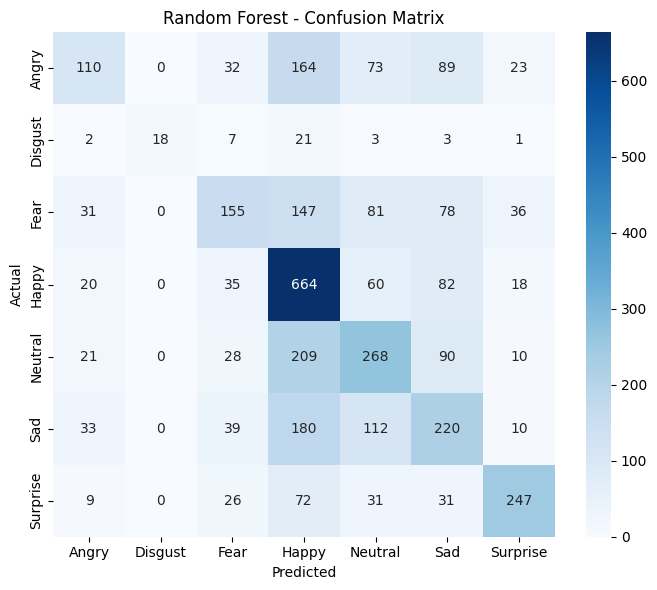


🔹 Training KNN...
 Validation Accuracy: 33.85%
Test Accuracy: 33.91%
Classification Report:
               precision    recall  f1-score   support

       Angry       0.22      0.32      0.26       491
     Disgust       0.25      0.55      0.34        55
        Fear       0.28      0.35      0.31       528
       Happy       0.40      0.40      0.40       879
     Neutral       0.32      0.35      0.34       626
         Sad       0.39      0.18      0.25       594
    Surprise       0.62      0.39      0.48       416

    accuracy                           0.34      3589
   macro avg       0.36      0.36      0.34      3589
weighted avg       0.37      0.34      0.34      3589



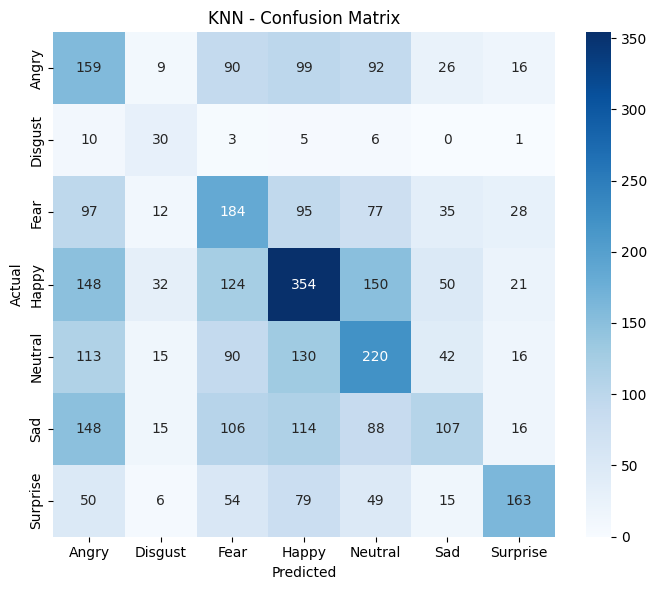

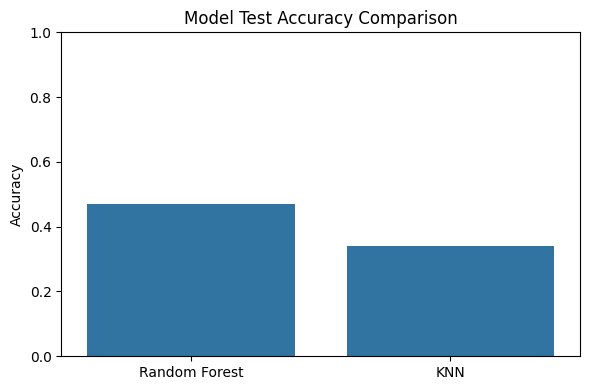

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

results = {}

# -------------------------------
# Train, Evaluate, and Compare
# -------------------------------
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)

    val_preds = model.predict(X_val)
    test_preds = model.predict(X_test)

    val_acc = accuracy_score(y_val, val_preds)
    test_acc = accuracy_score(y_test, test_preds)

    results[name] = {
        "val_acc": val_acc,
        "test_acc": test_acc,
        "test_preds": test_preds
    }

    print(f" Validation Accuracy: {val_acc:.2%}")
    print(f"Test Accuracy: {test_acc:.2%}")
    print("Classification Report:\n", classification_report(y_test, test_preds, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Plot Test Accuracy Comparison
# -------------------------------
plt.figure(figsize=(6, 4))
sns.barplot(x=list(results.keys()), y=[v["test_acc"] for v in results.values()])
plt.title("Model Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

The reason behind the low accuracy scores is


1.    Flattened Pixels Lose Spatial Relationships


*   The model doesn’t know eyes are above the mouth, or how parts of the face are connected.
*   Emotions are conveyed by subtle spatial patterns (eyebrows, corners of lips) — flattening destroys that


2.  Too Many Features (High-Dimensional Input)


*   2,304 features per sample is very high-dimensional.

*   KNN struggles due to the curse of dimensionality — all samples become "equidistant".

*  Random Forest loses generalization power with too many noisy/unimportant features.


3.   Sensitivity to Image Noise and Lighting

*   Facial emotion data varies with pose, lighting, facial angle, occlusion.

*   KNN and RF are sensitive to these kinds of noise in pixel data.







### **Implementation using Convolutional Neural Network**

### Imports and Setup

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Define dataset directories
train_dir = "/content/my_folder/train"
val_dir = "/content/my_folder/val"
test_dir = "/content/my_folder/test"

# Parameters
img_size = (48, 48)
batch_size = 32


In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# No augmentation for validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='rgb',
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


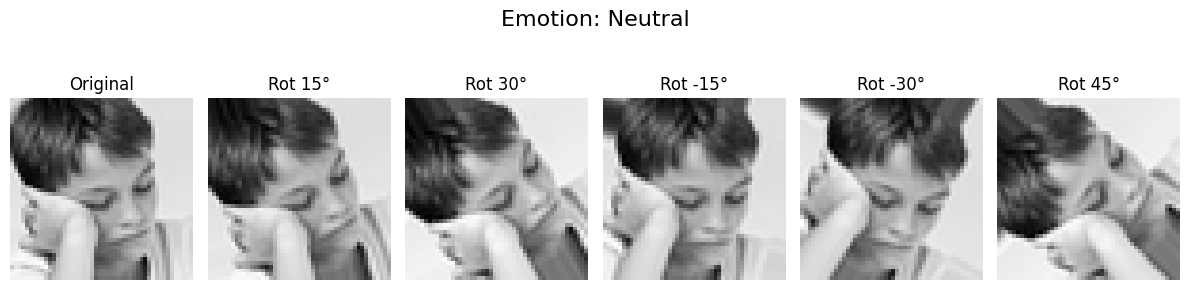

In [ ]:
import scipy.ndimage

image_size = (48, 48)
image_path = None
emotion_label = 'None'

# Load one image and its label
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.lower().endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(root, file)
            emotion_label = os.path.basename(root)
            break
    if image_path:
        break

# Load image
img = load_img(image_path, color_mode='grayscale', target_size=image_size)
img_array = img_to_array(img) / 255.0
img_array = img_array.squeeze()

# Define fixed rotation angles
rotation_angles = [0, 15, 30, -15, -30, 45]

# Plot original + rotated images
plt.figure(figsize=(12, 3))
plt.suptitle(f"Emotion: {emotion_label}", fontsize=16)

for i, angle in enumerate(rotation_angles):
    rotated = scipy.ndimage.rotate(img_array, angle, reshape=False, mode='nearest')
    plt.subplot(1, 6, i + 1)
    plt.imshow(rotated, cmap='gray')
    plt.title(f"Rot {angle}°" if angle != 0 else "Original")
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.show()


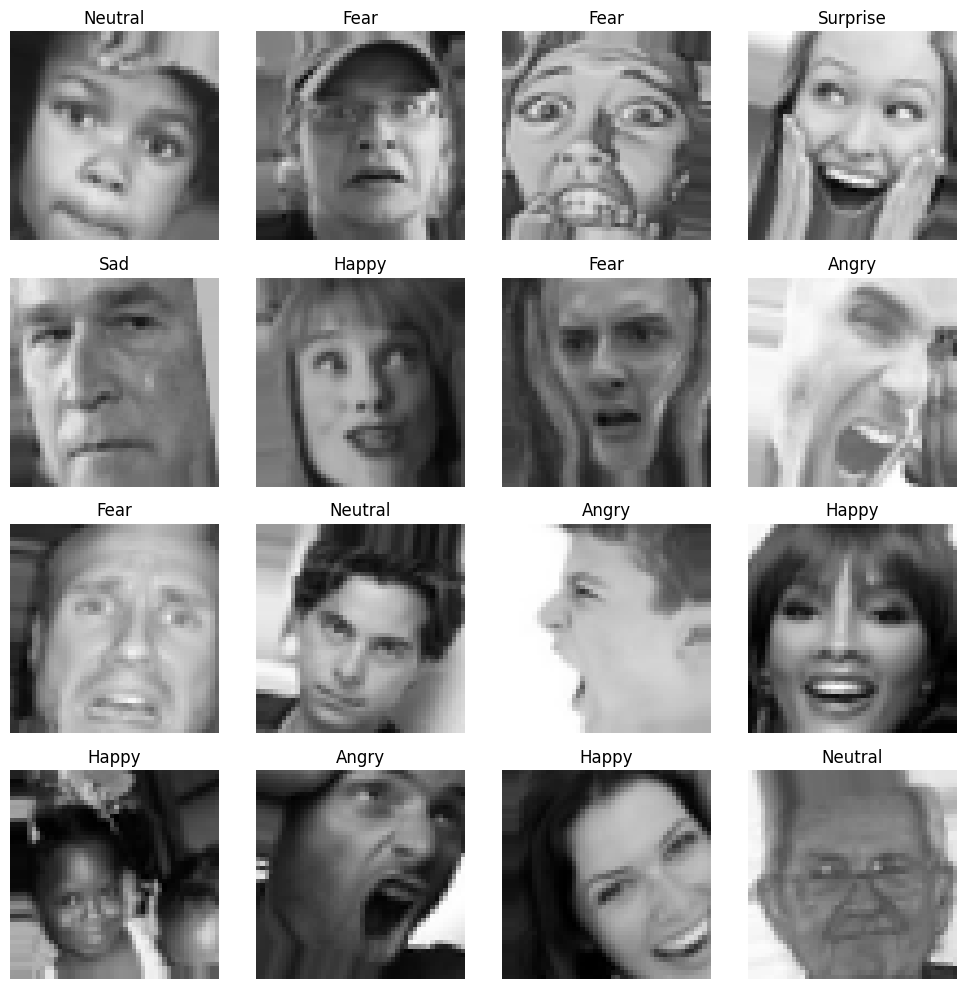

In [ ]:
# Get a batch of augmented images
aug_images, aug_labels = next(train_generator)

# Plot
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(aug_images[i].squeeze(), cmap='gray')
    plt.title(list(train_generator.class_indices.keys())[np.argmax(aug_labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy

IMG_SIZE = 48
NUM_CLASSES = 7

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Unfreeze last 4 convolutional layers of VGG16
for layer in base_model.layers[:-10]:
    layer.trainable = False
for layer in base_model.layers[-10:]:
    layer.trainable = True
# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.4)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.3, min_lr=1e-6, verbose=1)
checkpoint = ModelCheckpoint('best_vgg16_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,879,815 (56.76 MB)

 Trainable params: 13,734,407 (52.39 MB)

 Non-trainable params: 1,145,408 (4.37 MB)

In [ ]:
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop, reduce_lr, checkpoint],
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2317 - loss: 2.2250
Epoch 1: val_accuracy improved from -inf to 0.44163, saving model to best_vgg16_model.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 2518s 3s/step - accuracy: 0.2318 - loss: 2.2248 - val_accuracy: 0.4416 - val_loss: 1.6051 - learning_rate: 1.0000e-04
Epoch 2/30
712/898 ━━━━━━━━━━━━━━━━━━━━ 8:06 3s/step - accuracy: 0.4124 - loss: 1.6521

### **Evaluating on the Test Set**

In [ ]:
from tensorflow.keras.models import load_model

# Load the best checkpointed model
model = load_model('best_vgg16_model.keras')


In [ ]:
target_size=(96, 96)
color_mode='rgb'
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2%}")
print(f"Test Loss: {test_loss:.4f}")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy/loss
history = fine_tune_history.history

plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], 'b',label='Train Accuracy')
plt.plot(history['val_accuracy'], 'r--',label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history['loss'], 'b' , label='Train Loss')
plt.plot(history['val_loss'], 'r--',label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Get class labels from the test directory
class_labels = list(test_generator.class_indices.keys())
test_class_paths = [os.path.join(test_dir, cls) for cls in class_labels]

# Randomly choose a class and image
selected_class = random.choice(class_labels)
selected_class_path = os.path.join(test_dir, selected_class)
image_filename = random.choice(os.listdir(selected_class_path))
image_path = os.path.join(selected_class_path, image_filename)

# Load and preprocess the image
img = load_img(image_path, target_size=(96, 96))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred_probs = model.predict(img_array)
predicted_index = np.argmax(pred_probs)
predicted_label = class_labels[predicted_index]

# Display
plt.imshow(img)
plt.title(f"True: {selected_class} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()


**Predict Emotion on External (Custom) Image**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Replace with the actual filename of your uploaded image
image_path = list(uploaded.keys())[0]  # Automatically gets the uploaded file name

# Load and preprocess the image
img = load_img(image_path, target_size=(96, 96))  # RGB for VGG16
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
pred_probs = model.predict(img_array)
predicted_index = np.argmax(pred_probs)
class_labels = list(test_generator.class_indices.keys())
predicted_label = class_labels[predicted_index]

# Display the image
plt.imshow(img)
plt.title(f"Predicted Emotion: {predicted_label}")
plt.axis('off')
plt.show()
